In [1]:
import json
import pandas as pd

repo_profiles = {}
with open('repo_profiles.json') as rj:
    for rl in rj.readlines():
        line = rl.split('\t')
        repo = line[0]
        profile = json.loads(line[1])
        repo_profiles[repo] = profile
    
team_profiles = []
teams = []
with open('team_profiles.json') as tj:
    for tl in tj.readlines():
        line = tl.split('\t')
        team = json.loads(line[0])
        profile = json.loads(line[1])
        team_profiles.append(profile)
        teams.append(team)

In [2]:
repo_profiles_df = pd.DataFrame(repo_profiles).transpose()
repo_profiles_df.fillna('',inplace=True)
team_profiles_df = pd.DataFrame(team_profiles,index=[str(t) for t in teams])
team_profiles_df.rename(columns={
                                   'repo_size':'size',
                                   'repo_forks':'forks',
                                   'repo_subscribers':'subscribers',
                                   'repo_watchers':'watchers',
                                   'languages':'languages',
                                   'topics':'topics'
                               },inplace=True)
numerics = ['size','forks','subscribers','watchers']
min = repo_profiles_df[numerics].min()
max = repo_profiles_df[numerics].max()
repo_profiles_df[numerics] = (repo_profiles_df[numerics]-min)/(max-min)
team_profiles_df[numerics] = (team_profiles_df[numerics]-min)/(max-min)

print(repo_profiles_df.iloc[0])
print(team_profiles_df.iloc[0])

forks                                                1.04356e-05
languages      [HTML, Gherkin, Makefile, Python, CSS, Shell, ...
size                                                 0.000276069
subscribers                                          0.000933925
topics                                                          
watchers                                             3.37046e-06
Name: ccnmtl/uelc, dtype: object
languages      [HTML, CSS, Python, JavaScript]
forks                              0.000122619
size                               2.99895e-05
subscribers                         0.00192622
watchers                           0.000128078
topics                                      []
Name: ['AMorporkian', 'kharidiron'], dtype: object


In [3]:
repo_profiles_df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002292CC9FA58>,
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002292D441C50>,
      dtype=object)

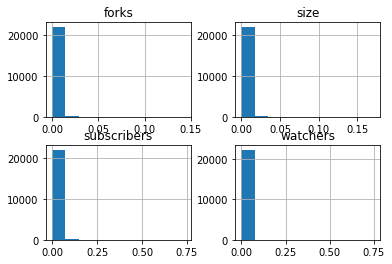

In [4]:
team_profiles_df.hist()

In [5]:
repo_profiles_df.describe()

,forks,size,subscribers,watchers
count,83013.000000,83013.000000,83013.000000,83013.000000
mean,0.000705,0.000917,0.005607,0.001829
std,0.005159,0.005798,0.018888,0.010963
min,0.000000,0.000000,0.000000,0.000000
25%,0.000026,0.000010,0.000934,0.000010
50%,0.000120,0.000056,0.002101,0.000091
75%,0.000381,0.000371,0.004786,0.000650
max,1.000000,1.000000,1.000000,1.000000


In [6]:
team_profiles_df.describe()

,forks,size,subscribers,watchers
count,22330.000000,2.233000e+04,22330.000000,22330.000000
mean,0.001999,1.710201e-03,0.011510,0.004689
std,0.004260,4.203524e-03,0.020819,0.014758
min,0.000000,3.429433e-07,0.000000,0.000000
25%,0.000245,1.999221e-04,0.002815,0.000240
50%,0.000789,6.011164e-04,0.005915,0.001209
75%,0.002131,1.573824e-03,0.012524,0.004808
max,0.143161,1.714984e-01,0.736896,0.750063


In [7]:
import numpy as np

def euclidean_distance(p1,p2):
    distance = np.linalg.norm(p1[numerics]-p2[numerics])**2
    langs = set(p1['languages']).union(p2['languages'])
    topics = set(p1['topics']).union(p2['topics'])
    p1_langs = pd.Series([lang in p1['languages'] for lang in langs])/np.sqrt(len(langs))
    p2_langs = pd.Series([lang in p2['languages'] for lang in langs])/np.sqrt(len(langs))
    p1_topics = pd.Series([topic in p1['topics'] for topic in topics])/np.sqrt(len(topics))
    p2_topics = pd.Series([topic in p2['topics'] for topic in topics])/np.sqrt(len(topics))
    distance += np.linalg.norm(p1_langs-p2_langs)**2 + np.linalg.norm(p1_topics-p2_topics)**2
    distance = np.sqrt(distance)
    
    return distance
    
p1 = repo_profiles_df.iloc[0]
p2 = team_profiles_df.iloc[0]
print(euclidean_distance(p1,p2))

0.7071075401534226


In [8]:
from queue import PriorityQueue

team_recommendations = []
cnt = 0
for repo,repo_profile in repo_profiles_df.iterrows():
    cnt += 1
    if cnt > 10:
        break
    print(cnt)
    rec = []
    queue = PriorityQueue()
    for team,team_profile in team_profiles_df.iterrows():
        dis = euclidean_distance(repo_profile,team_profile)
        queue.put_nowait((-dis,team))
        if queue.qsize() > 20:
            queue.get_nowait()
    while queue.qsize()>0:
        rec.append(queue.get_nowait())
    team_recommendations.append(rec)


1
2
3
4
5
6
7
8
9
10


In [9]:
for i,rec in enumerate(team_recommendations):
    print(repo_profiles_df.iloc[i].name,end='\t')
    for tm in rec:
        print(tm,end='\t')
    print('\n')

ccnmtl/uelc	(-0.6666679641480108, "['ariel-phet', 'jessegreenberg', 'phet-steele', 'dubson', 'terracoda', 'memo330179', 'mbarlow12', 'lmulhall-phet']")	(-0.6666679162402048, "['pixelzoom', 'amanda-phet', 'jonathanolson', 'arouinfar', 'veillette', 'aaronsamuel137', 'zepumph', 'andrewadare', 'mattpen', 'aadish', 'schmitzware', 'Denz1994', 'andrealin', 'michaelm396']")	(-0.6666679162402048, "['samreid', 'jbphet', 'andrey-zelenkov', 'AshrafSharf', 'arnabp', 'notsiddhartha', 'ChandrashekarBemagoni', 'davisv7', 'SaurabhTotey']")	(-0.6666675793242052, "['Zrubi', 'Nukama', 'andrewdavidwong', 'omeg', 'desci', 'pgerber', 'gutsle', 'tokideveloper', 'na--', 'adubois']")	(-0.6455632894812708, "['maethu', 'jone', 'toutpt', 'buchi', 'gbastien', 'rpatterson', 'mtrebron', 'Rotonen', 'Nachtalb']")	(-0.6324617533127542, "['phgross', 'deiferni', 'mbaechtold', 'bierik', 'shylux', 'elioschmutz', 'phabegger', 'tschanzt', 'bbuehlmann', 'raphael-s', 'fguyer', 'tarnap', 'njohner']")	(-0.6324563005968928, "['shy